In [42]:
deneme

NameError: name 'deneme' is not defined

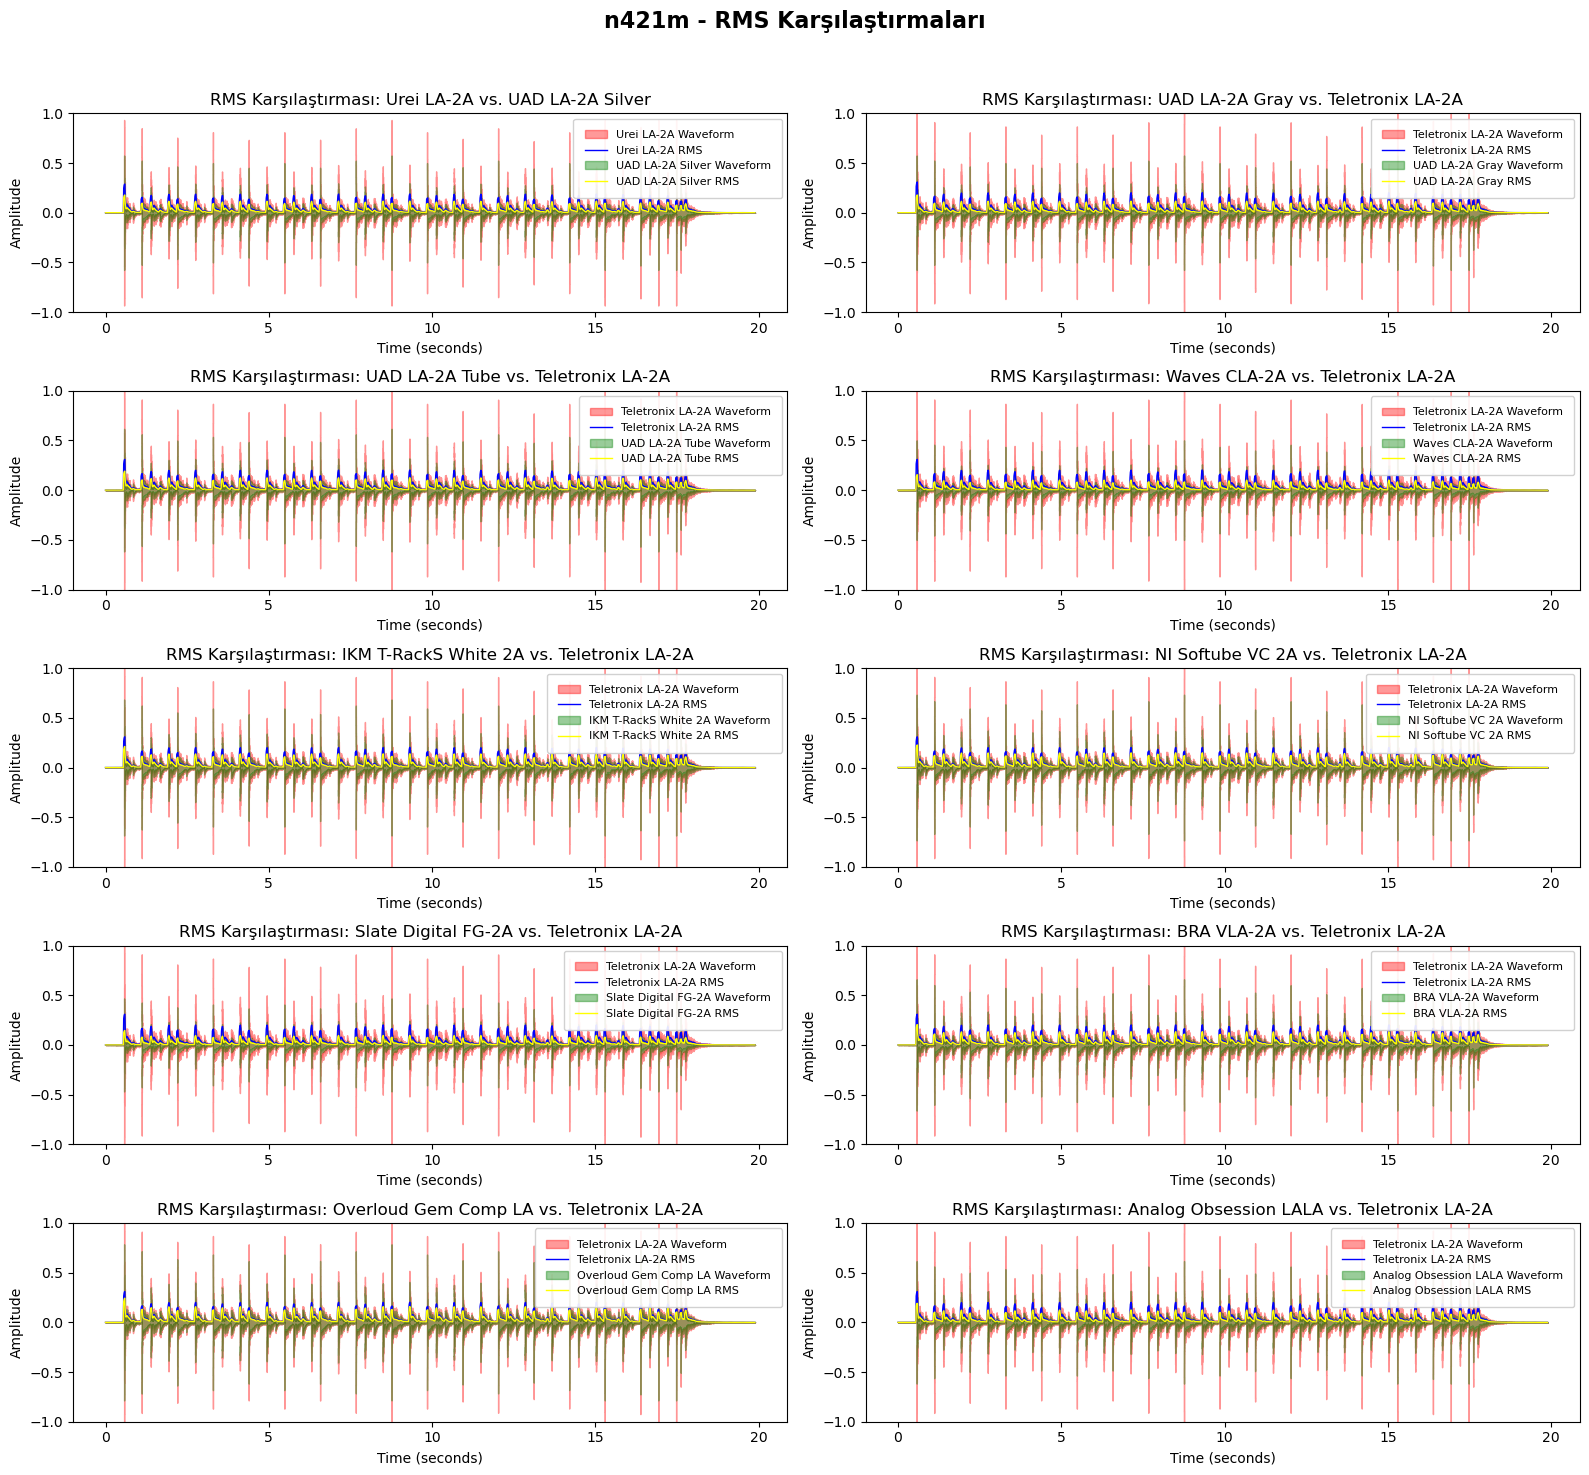

In [11]:
# n421m: Librosa sisteminin aktarılması

import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.
from scipy import signal # Python'daki SciPy kütüphanesinin signal modülünü içe aktarmaya yarar.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/fldr/teletronix.wav",
    "/Users/nazimerensahin/Desktop/fldr/urei.wav",     
    "/Users/nazimerensahin/Desktop/fldr/gray.wav",
    "/Users/nazimerensahin/Desktop/fldr/silver.wav",
    "/Users/nazimerensahin/Desktop/fldr/tube.wav",
    "/Users/nazimerensahin/Desktop/fldr/cla_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/white_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/vc_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/fg_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/vla_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/comp_la.wav",
    "/Users/nazimerensahin/Desktop/fldr/lala.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# Teletronix LA-2A referans olarak yükleme
ref_file = audio_files[0]
ref_label = audio_labels[0]
ref_sound, ref_sr = librosa.load(ref_file, sr=None)

# RMS hesaplama fonksiyonu
def compute_rms(sound, sr, frame_length=2048, hop_length=512):
    rms = librosa.feature.rms(y=sound, frame_length=frame_length, hop_length=hop_length)[0]
    time = librosa.times_like(rms, sr=sr, hop_length=hop_length)
    return rms, time

# Referans RMS hesaplamaları
ref_rms, ref_time = compute_rms(ref_sound, ref_sr)

# Urei LA-2A dosyasını yükleme ve RMS hesaplama
urei_file = audio_files[1]
urei_label = audio_labels[1]
urei_sound, urei_sr = librosa.load(urei_file, sr=None)
urei_rms, urei_time = compute_rms(urei_sound, urei_sr)

# UAD LA-2A Silver dosyasını yükleme ve RMS hesaplama
silver_file = audio_files[3]
silver_label = audio_labels[3]
silver_sound, silver_sr = librosa.load(silver_file, sr=None)
silver_rms, silver_time = compute_rms(silver_sound, silver_sr)

# Grafik düzeni: 10 grafik olacak
n_cols = 2
n_rows = 5

# Grafik figürü oluşturma
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))

# Çoklu eksenler için 2D düzeni 1D olarak işleme
axes = axes.flatten()

# Urei ve UAD Silver karşılaştırması
ax = axes[0]
librosa.display.waveshow(urei_sound, sr=urei_sr, alpha=0.4, color='red', ax=ax, label=f"{urei_label} Waveform")
ax.plot(urei_time, urei_rms, color="blue", linewidth=1, label=f"{urei_label} RMS")
librosa.display.waveshow(silver_sound, sr=silver_sr, alpha=0.4, color='green', ax=ax, label=f"{silver_label} Waveform")
ax.plot(silver_time, silver_rms, color="yellow", linewidth=1, label=f"{silver_label} RMS")
ax.set_title(f"RMS Karşılaştırması: {urei_label} vs. {silver_label}")
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude")
ax.set_ylim((-1, 1))
ax.legend(fontsize=8, loc="upper right", frameon=True, framealpha=0.9, borderpad=1)

# Diğer pluginleri Teletronix ile karşılaştırma
valid_idx = 1  # Grafik için kullanılacak eksen indeksi (ilk grafik dolu)
for file, label in zip(audio_files[2:], audio_labels[2:]):
    # Urei ve Silver'ı atla
    if label in [urei_label, silver_label]:
        continue
    
    sound, sr = librosa.load(file, sr=None)
    rms, time = compute_rms(sound, sr)

    ax = axes[valid_idx]
    librosa.display.waveshow(ref_sound, sr=ref_sr, alpha=0.4, color='red', ax=ax, label=f"{ref_label} Waveform")
    ax.plot(ref_time, ref_rms, color="blue", linewidth=1, label=f"{ref_label} RMS")
    librosa.display.waveshow(sound, sr=sr, alpha=0.4, color='green', ax=ax, label=f"{label} Waveform")
    ax.plot(time, rms, color="yellow", linewidth=1, label=f"{label} RMS")
    ax.set_title(f"RMS Karşılaştırması: {label} vs. {ref_label}")
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Amplitude")
    ax.set_ylim((-1, 1))
    ax.legend(fontsize=8, loc="upper right", frameon=True, framealpha=0.9, borderpad=1)
    
    valid_idx += 1  # Sonraki eksene geç

# Boş kalan alt eksenleri gizleme
for idx in range(valid_idx, len(axes)):
    fig.delaxes(axes[idx])

# Genel düzen ve grafik gösterimi
plt.suptitle("n421m - RMS Karşılaştırmaları", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Başlık için üst alan ayarı
plt.show()
